En este cuaderno probaremos algunas reglas de plasticidad sináptica y sus consecuencias estadísticas.
Empezamos con la regla de Oja

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [37]:
def crear_disparos_aleatorios(n=100):
    return np.random.rand(n, 1)

def crear_tren_disparos(t, n=100):
    spike_train = np.zeros_like(t)
    spike_indices = np.random.choice(len(t), size=100, replace=False)
    spike_train[spike_indices] = 1
    return t[spike_indices]

In [ ]:
def graficar_puntos(puntos_x, puntos_y, w0):
    # Graficamos los puntos
    plt.scatter(puntos_x, puntos_y)
    
    # Graficamos el peso inicial
    plt.arrow(0, 0, w0[0].item(), w0[1].item(), width=0.01)

Definamos un modelo neuronal muy simple: un sistema de dos neuronas en el cual podemos medir su actividad. El vector $\pmb{x}$ define la actividad de las dos neuronas en un instante dado:

$$ \pmb{x} = \begin{bmatrix} 2 \\ 3 \end{bmatrix} $$

Tiene, entonces, dos componentes: $x_{1}$ y $x_{2}$. Uno para definir la actividad de cada neurona.

Agreguemos una tercera neurona cuya actividad esté mediada por la actividad de del sistema de neuronas recién definido. Para modelar la influencia que cada neurona pueda tener sobre esta tercera neurona, podemos definir un segundo vector $\pmb{z}$:

$$ \pmb{z} = \begin{bmatrix} 1 \\ 4 \end{bmatrix} $$

donde sus compontentes, $z_{1}$ y $z_{2}$, modelan el peso que tiene cada neurona $x_{1}$ y $x_{2}$ respectivamente sobre esta tercera neurona.

La actividad de esta tercera neurona se puede modelar como el **producto escalar** entre estos dos vectores:

$$ \pmb{x} \cdot \pmb{z} = x_{1} z_{1} + x_{2} z_{2} = 2 \times 1 + 3 \times 4 = 14 $$

In [139]:
x = np.array([2, 3])
w = np.array([1, 4])

print(x.shape)
print(w.shape)
print(x @ w)

(2,)
(2,)
14


In [154]:
r1 = crear_disparos_aleatorios(100)
r2 =  1 + 2 * r1 + 0.3 * np.random.rand(100, 1)

x = np.hstack([r1, r2])
w = np.array([-0.2, 0.5])

print(x.shape)
print(w.shape)
print(x @ w)

(100, 2)
(2,)
[0.78619249 1.09061703 1.3577659  0.94744155 0.81446831 1.40044773
 1.0270239  0.6086435  0.87418655 1.13037772 1.10920911 1.09751401
 0.75498415 1.28771948 1.0354175  1.18712827 0.8884181  0.88019918
 1.19618297 1.35001759 0.75560281 0.73085476 1.08628964 0.77810061
 1.18671851 0.81003058 1.39057385 1.2962985  0.74772878 1.30738958
 1.14710462 0.76748108 1.27075986 1.34052713 1.32588257 1.27042565
 0.659019   0.68657218 0.96813924 0.91984209 0.90249716 1.20700116
 1.12242301 1.28464349 1.13108588 1.28663841 1.1838247  1.23153411
 0.9894473  0.62744528 0.56665483 0.63966707 1.08970829 0.76356367
 0.69168716 0.878317   0.77647429 1.26540713 0.94479481 0.53392267
 1.12272362 1.28413219 1.1297243  1.23922366 1.3490615  0.80801209
 0.65911724 0.63628872 1.00091111 1.33743519 1.21703633 0.82771158
 1.04436885 0.8808983  1.1920099  0.74844166 1.23745795 0.92799341
 0.74688625 1.16855798 1.40886801 0.83215918 0.89128195 0.74612072
 0.77870023 0.71270343 0.72436959 0.91444471 1.1

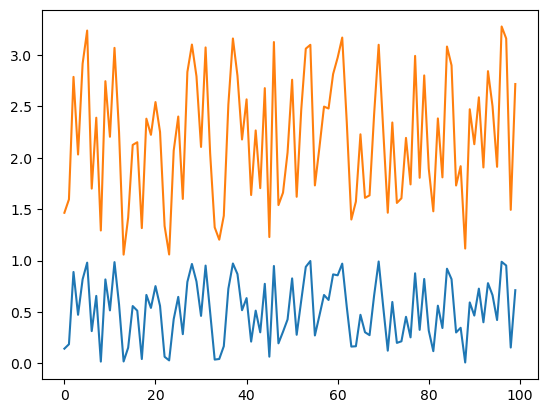

In [147]:
plt.plot(x)
plt.show()

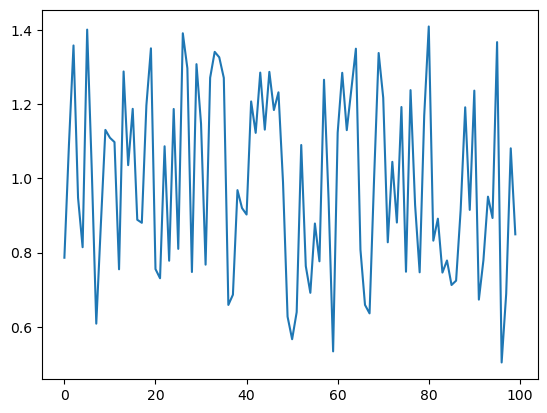

In [156]:
plt.plot(x @ w)
plt.show()

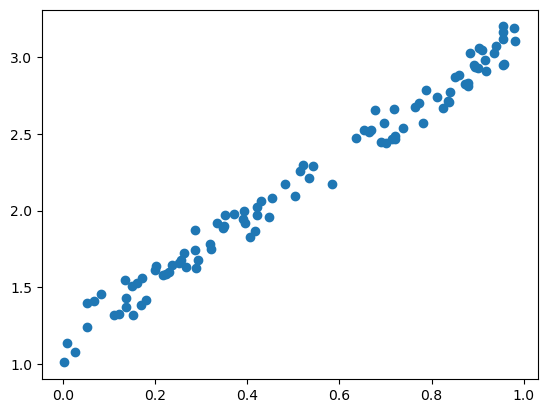

In [162]:
plt.scatter(x.T[0], x.T[1])
plt.show()

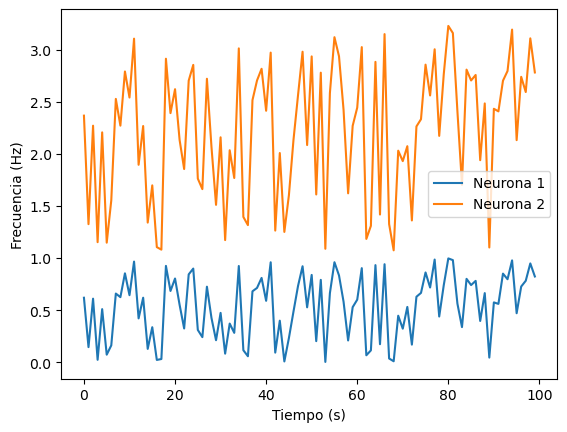

In [107]:
r1 = crear_disparos_aleatorios(100)
r2 =  1 + 2 * r1 + 0.3 * np.random.rand(100, 1)

fig, ax = plt.subplots()
ax.plot(r1, label="Neurona 1")
ax.plot(r2, label="Neurona 2")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Frecuencia (Hz)")
plt.legend()
plt.show()

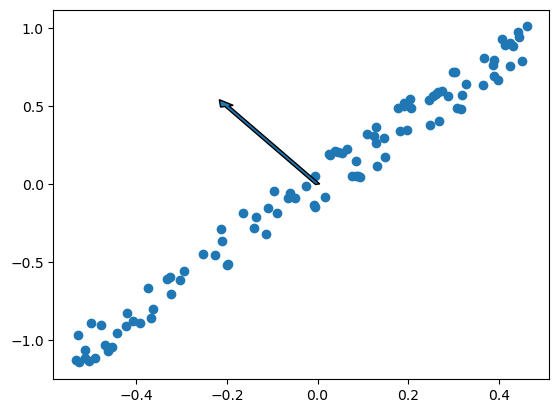

In [108]:
# Graficamos los puntos
plt.scatter(r1 - np.mean(r1), r2 - np.mean(r2))

w = np.array([-0.2, 0.5])

# Graficamos el peso inicial
plt.arrow(0, 0, w[0].item(), w[1].item(), width=0.01)

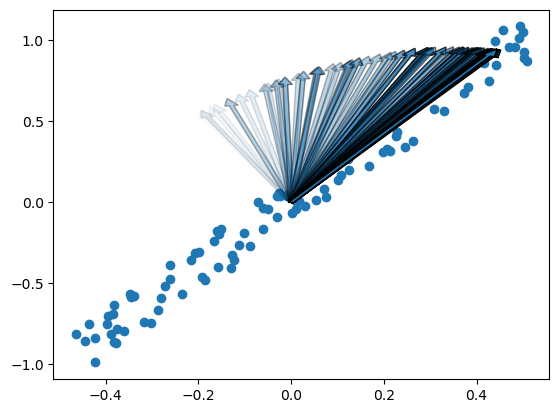

In [121]:
r1 = crear_disparos_aleatorios(100)
r2 =  1 + 2 * r1 + 0.3 * np.random.rand(100, 1)

# Valor inicial de los pesos sinápticos
w = np.array([-0.2, 0.5])

# Graficamos los puntos
plt.scatter(r1 - np.mean(r1), r2 - np.mean(r2))

for i in range(100):
    ri = (r1 - np.mean(r1))[i].item()
    rj = (r2 - np.mean(r2))[i].item()
    rPost = ri * w[0] + rj * w[1]
    w[0] = w[0] + 0.1 * (rPost * ri - (rPost ** 2) * w[0])
    w[1] = w[1] + 0.1 * (rPost * rj - (rPost ** 2) * w[1])

    # Graficamos el peso inicial
    plt.arrow(0, 0, w[0].item(), w[1].item(), width=0.01, alpha=i/100)

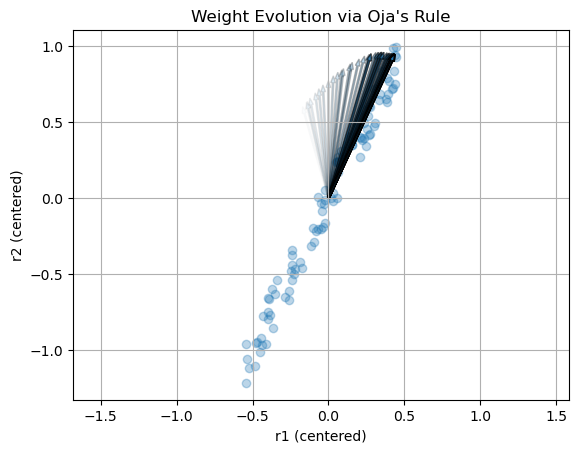

In [122]:
def crear_disparos_aleatorios(n):
    return np.random.rand(n, 1)

# Generate data
r1 = crear_disparos_aleatorios(100)
r2 = 1 + 2 * r1 + 0.3 * np.random.rand(100, 1)

# Stack and center inputs: shape (100, 2)
R = np.hstack((r1, r2))
R_centered = R - np.mean(R, axis=0)

# Initial weights
w = np.array([-0.2, 0.5])
w_history = [w.copy()]

# Learning rate
eta = 0.1

# Training with Oja's rule
for i in range(R_centered.shape[0]):
    r = R_centered[i, :]            # shape (2,)
    y = np.dot(w, r)                # scalar
    w += eta * y * (r - y * w)      # vector update
    w_history.append(w.copy())

# Convert history to array for plotting
w_history = np.array(w_history)

# Plotting
plt.scatter(R_centered[:, 0], R_centered[:, 1], alpha=0.3)
for i in range(0, len(w_history), 2):  # draw fewer arrows for clarity
    plt.arrow(0, 0, w_history[i, 0], w_history[i, 1], width=0.01, alpha=i / len(w_history))
plt.xlabel("r1 (centered)")
plt.ylabel("r2 (centered)")
plt.title("Weight Evolution via Oja's Rule")
plt.axis('equal')
plt.grid(True)
plt.show()

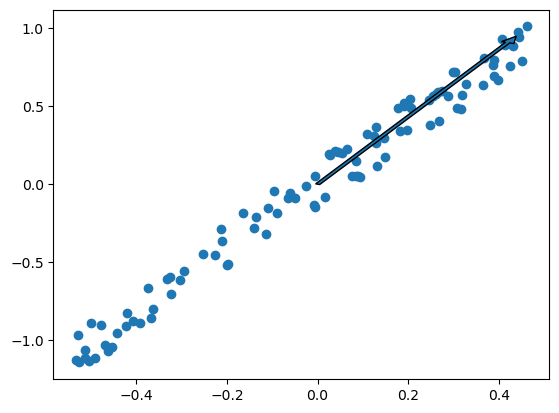

In [117]:
# Graficamos los puntos
plt.scatter(r1 - np.mean(r1), r2 - np.mean(r2))

# Graficamos el peso inicial
plt.arrow(0, 0, w[0].item(), w[1].item(), width=0.01)

In [2]:
npuntos=100
puntos_x = np.random.rand(npuntos, 1)
puntos_y = 1 + 2 * puntos_x + 0.3 * np.random.rand(npuntos, 1)
m0 = np.mean(puntos_x)
n0 = np.mean(puntos_y)
puntos_x = puntos_x - m0
puntos_y = puntos_y - n0

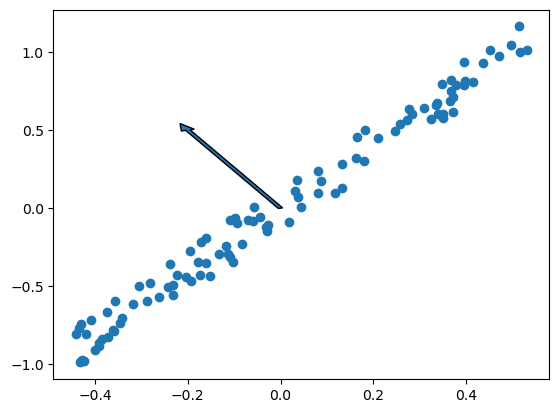

In [3]:
# Valor inicial de los pesos sinápticos
w0 = np.array([[-0.2], [0.5]])

# Graficamos los puntos
plt.scatter(puntos_x, puntos_y)

# Graficamos el peso inicial
plt.arrow(0, 0, w0[0].item(), w0[1].item(), width=0.01)

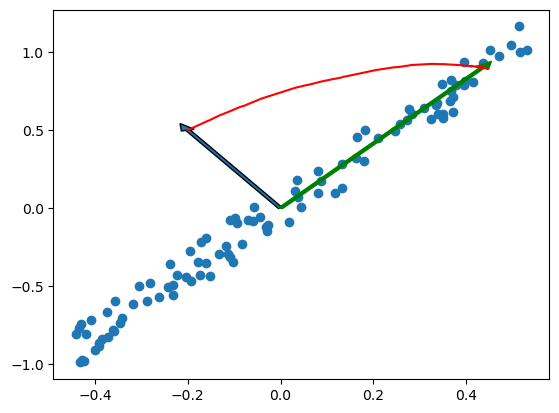

In [4]:
# Número de iteraciones del entrenamiento
niter = 100
eta = 0.1

w = np.zeros((npuntos*niter+1,2))
w[0,0]=w0[0].item()
w[0,1]=w0[1].item()
for i in range(niter):
    for j in range(npuntos):
        z = w[npuntos * i + j, 0] * puntos_x[j].item() + w[npuntos*i+j,1] * puntos_y[j].item()
        w[npuntos * i + j + 1, 0] = w[npuntos*i+j, 0] + eta * z * (puntos_x[j].item() - z * w[npuntos*i+j, 0])
        w[npuntos * i + j + 1, 1] = w[npuntos*i+j, 1] + eta * z * (puntos_y[j].item() - z * w[npuntos*i+j,1])

# Graficamos los puntos
plt.scatter(puntos_x, puntos_y)

# Graficamos el peso inicial, como una flecha negra
plt.arrow(0, 0, w0[0].item(), w0[1].item(), width=0.01)

# Graficamos todos los pesos aprendidos a lo largo del tiempo, como una curva roja
plt.plot(w[:,0],w[:,1], "r")

# Graficamos el peso final, como una flecha verde
plt.arrow(0, 0, w[-1, 0].item(), w[-1, 1].item(), width=0.01, facecolor='g', edgecolor='g')

In [5]:
print(w[-1])

[0.43559165 0.90017816]
